In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('banking3.csv')
df.head()

,Unnamed: 0,euribor3m,job_blue-collar,job_housemaid,marital_single,education_illiterate,default_no,contact_cellular,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_success,y
0,0,4.963,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,1,4.021,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2,0.729,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
3,3,1.405,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,4,0.869,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


In [3]:
X = df.drop(["y","Unnamed: 0"],axis = 1)
y = df["y"]

In [9]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [11]:
4640/(36548+4640)

0.11265417111780131

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF_model = RandomForestClassifier(n_estimators=1000, random_state=1, max_features=None, max_depth=None)

RF_model.fit(X_train,y_train)

y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.8969814679938496


In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix)

[[10682   299]
 [  974   402]]


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10981
           1       0.57      0.29      0.39      1376

    accuracy                           0.90     12357
   macro avg       0.74      0.63      0.67     12357
weighted avg       0.88      0.90      0.88     12357



In [28]:
X_test.iloc[:,1]

15500    1
29034    0
11199    1
22247    0
27180    0
        ..
20920    0
15744    0
34965    0
4644     0
20742    0
Name: job_blue-collar, Length: 12357, dtype: int64

In [13]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_logreg = RF_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_logreg)  
    # matches y_test of 1's and 0's versus pred prob of 1's for each of the 197 test cases
    # sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    # this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
    
    # above can also be done using: fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_logreg = metrics.auc(fpr, tpr)
    # sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
    # Compute Area Under the Curve (AUC) using the trapezoidal rule.
    # This is a general function, given points on a curve. For computing the area under the ROC-curve, see roc_auc_score. 
roc_auc_logreg

0.7713693962404408

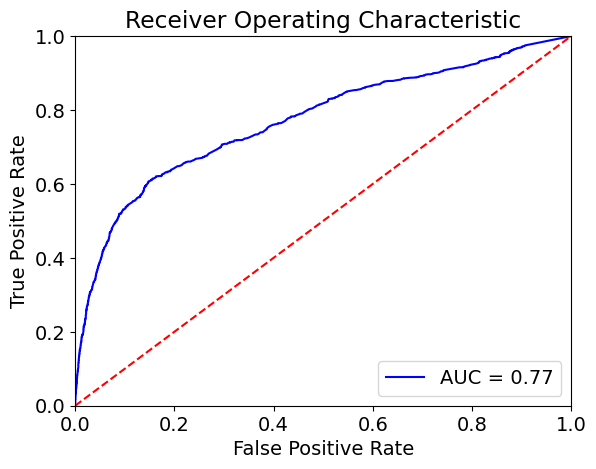

In [14]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
RF_model.feature_importances_

array([0.66008517, 0.03574613, 0.01397125, 0.05345306, 0.00142858,
       0.02407047, 0.02396583, 0.00984752, 0.00742382, 0.00411203,
       0.00757395, 0.00983875, 0.00365068, 0.02709057, 0.00552117,
       0.01970993, 0.02919743, 0.06331367])

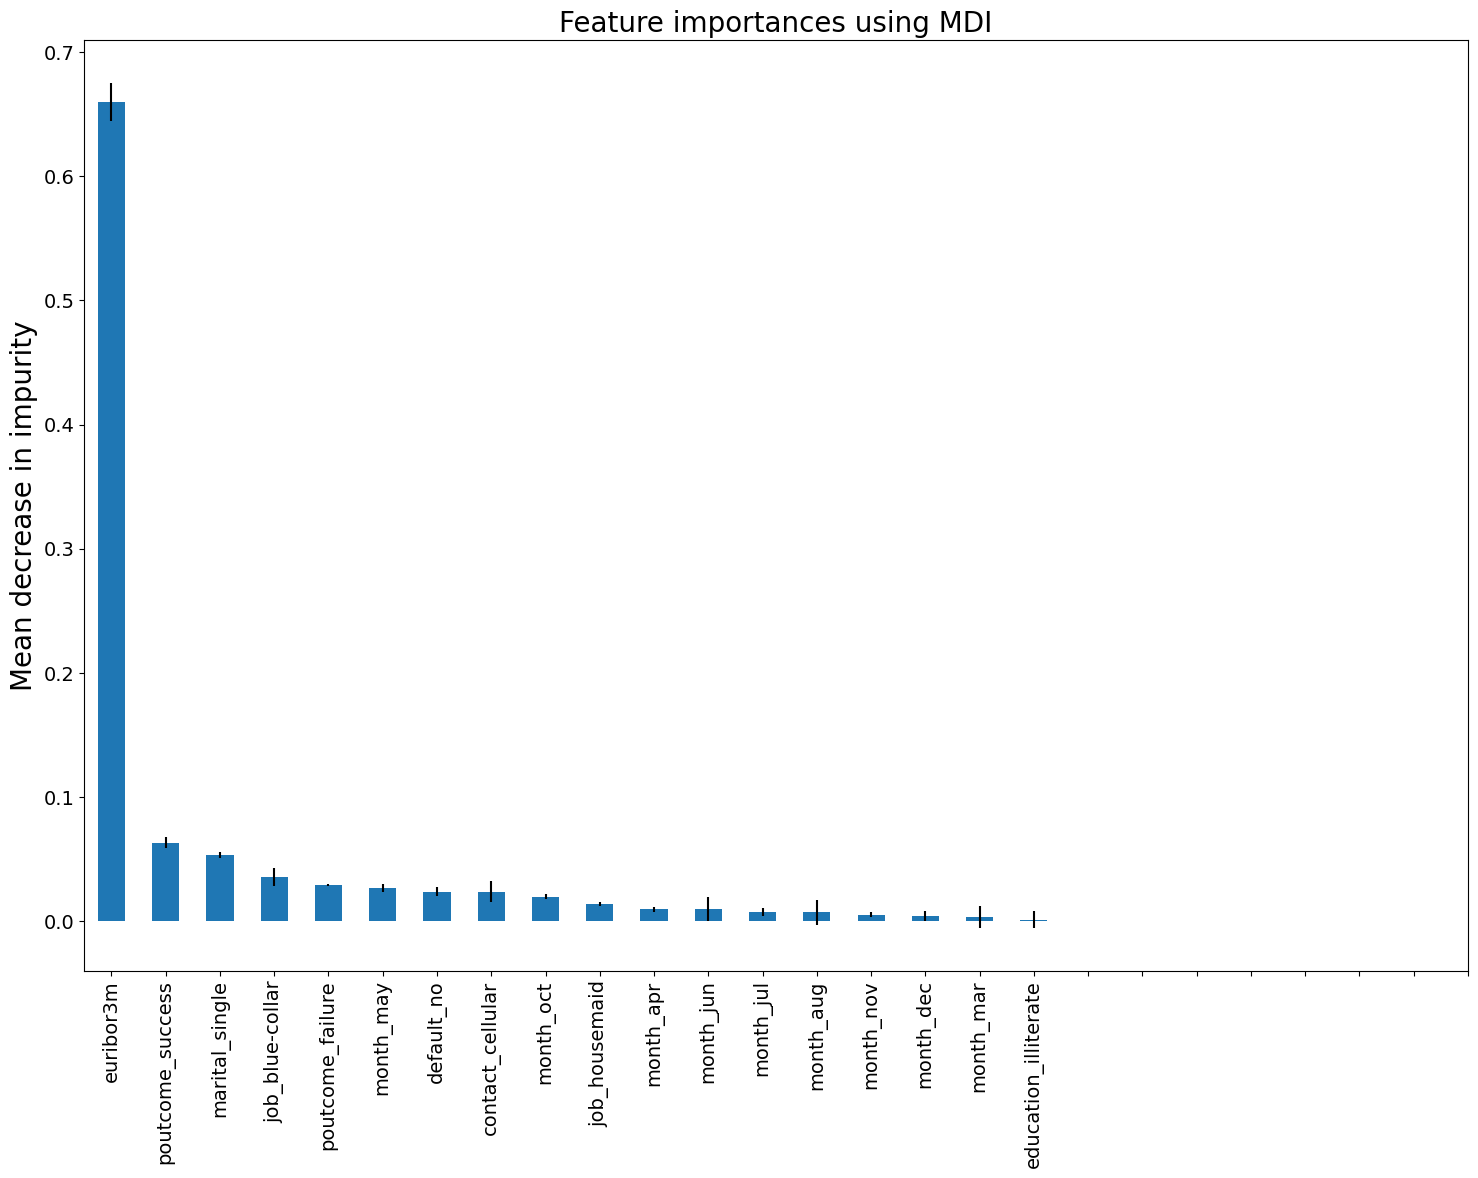

In [18]:
forest_importances = pd.Series(RF_model.feature_importances_, index=X_train.columns)
forest_importances.sort_values(ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(15,12))
forest_importances.plot.bar(yerr=np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis=0), ax=ax) 
### thin line indicates 1 std err from the mean either way -- doesn't mean mean decrease is neg
ax.set_title("Feature importances using MDI",fontsize=20)  ### MDI is mean decrease in impurity 
ax.set_ylabel("Mean decrease in impurity",fontsize=20)
ax.set(xticks=([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
 24,25]))
### define own x-ticks to avoid clutter, entry must be a list
fig.tight_layout()

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
Lresult=logreg.fit(X_train, y_train)
print(Lresult.coef_, Lresult.intercept_)

[[-0.50276771 -0.22836997 -0.17031726  0.05561977  0.68030649  0.27862184
   0.14060309 -0.62933589 -0.36323227 -0.18264397 -0.06522158 -0.14698165
   0.39278335 -1.25216266 -0.47031418  0.11110344 -0.35436338  1.47783126]] [-0.39095884]
